<a href="https://colab.research.google.com/github/neermesh/deep-learning/blob/master/tensorflow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import requests
import sys
import time
import math
import warnings
import numpy as np
import pandas as pd
from keras.layers import LSTM
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from keras.models import Sequential
import sklearn.preprocessing as prep
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [26]:
url = "https://www1.nseindia.com/content/indices/ind_nifty50list.csv"
s = requests.get(url).content
nifty50 = pd.read_csv(io.StringIO(s.decode('utf-8')))
nifty50

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024
5,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018
6,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
7,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024
8,Bharti Infratel Ltd.,TELECOM,INFRATEL,EQ,INE121J01017
9,Britannia Industries Ltd.,CONSUMER GOODS,BRITANNIA,EQ,INE216A01030


In [0]:
from pandas_datareader import data as pdr
df = pdr.get_data_yahoo('CIPLA.NS')

In [0]:
df = df[::-1]

In [35]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-07,445.899994,437.299988,440.000000,442.250000,6296276.0,442.250000
2020-02-06,464.350006,435.350006,462.500000,439.649994,7118725.0,439.649994
2020-02-05,459.149994,437.500000,449.549988,447.549988,3637403.0,447.549988
2020-02-04,452.450012,444.200012,446.700012,448.450012,2030860.0,448.450012
2020-02-03,450.649994,439.399994,444.000000,444.549988,1690394.0,444.549988
...,...,...,...,...,...,...
2010-01-08,346.500000,340.200012,345.000000,341.100006,913410.0,322.900757
2010-01-07,350.399994,340.500000,346.000000,342.049988,1555841.0,323.800049
2010-01-06,348.899994,330.350006,332.000000,344.899994,3580916.0,326.497986


In [0]:
df = df[[ "High", "Low", "Open","Close"]]

In [0]:
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [0]:
np.random.seed(7)
dataset = df

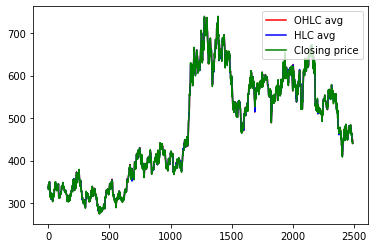

In [12]:
dataset = dataset.reindex(index = dataset.index[::-1])
obs = np.arange(1, len(dataset) + 1, 1)
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [13]:
close_val = np.reshape(close_val.values, (len(close_val),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
close_val = scaler.fit_transform(close_val)
train_close_val = int(len(close_val) * 0.75)
test_close_val = len(close_val) - train_close_val
train_close_val, test_close_val = close_val[0:train_close_val,:], close_val[train_close_val:len(close_val),:]
print(train_close_val)
trainX, trainY = new_dataset(train_close_val, 1)
testX, testY = new_dataset(test_close_val, 1)



[[0.13556223]
 [0.1225543 ]
 [0.15136529]
 ...
 [0.63480975]
 [0.6233069 ]
 [0.64706521]]


In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1



In [15]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





 - 7s - loss: 0.0051
Epoch 2/5
 - 6s - loss: 5.2777e-04
Epoch 3/5
 - 7s - loss: 4.6080e-04
Epoch 4/5
 - 7s - loss: 4.1714e-04
Epoch 5/5
 - 7s - loss: 3.8256e-04


In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])




In [18]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))



Train RMSE: 8.84
Test RMSE: 10.12


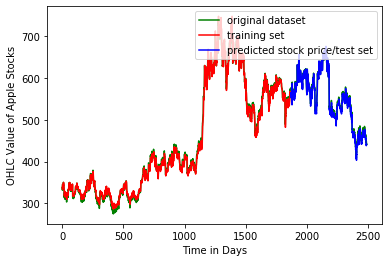

In [19]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(close_val)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(close_val)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(close_val)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(close_val)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(dataset['Close'].values, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()



In [20]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Day Value: 440.9616394042969
Next Day Value: 449.3065490722656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


In [21]:
testPredict[-1]

array([440.96164], dtype=float32)

In [22]:
df

,High,Low,Open,Close
Date,,,,
2020-02-07,444.899994,437.299988,440.000000,441.600006
2020-02-06,464.350006,435.350006,462.500000,439.649994
2020-02-05,459.149994,437.500000,449.549988,447.549988
2020-02-04,452.450012,444.200012,446.700012,448.450012
2020-02-03,450.649994,439.399994,444.000000,444.549988
...,...,...,...,...
2010-01-08,346.500000,340.200012,345.000000,341.100006
2010-01-07,350.399994,340.500000,346.000000,342.049988
2010-01-06,348.899994,330.350006,332.000000,344.899994
